## Factor Gamma / Modelo CROP-2 
El factor gamma permite realizar correciones sobre las recosntrucciones comparando con la mezcla original


2025-10-08 20:31:12.826390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 20:31:12.830121: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-08 20:31:12.840062: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759966272.856760  906199 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759966272.861577  906199 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1759966272.875810  906199 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Usando fashion como dataset


E0000 00:00:1759966277.115087  906199 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1759966277.115723  906199 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


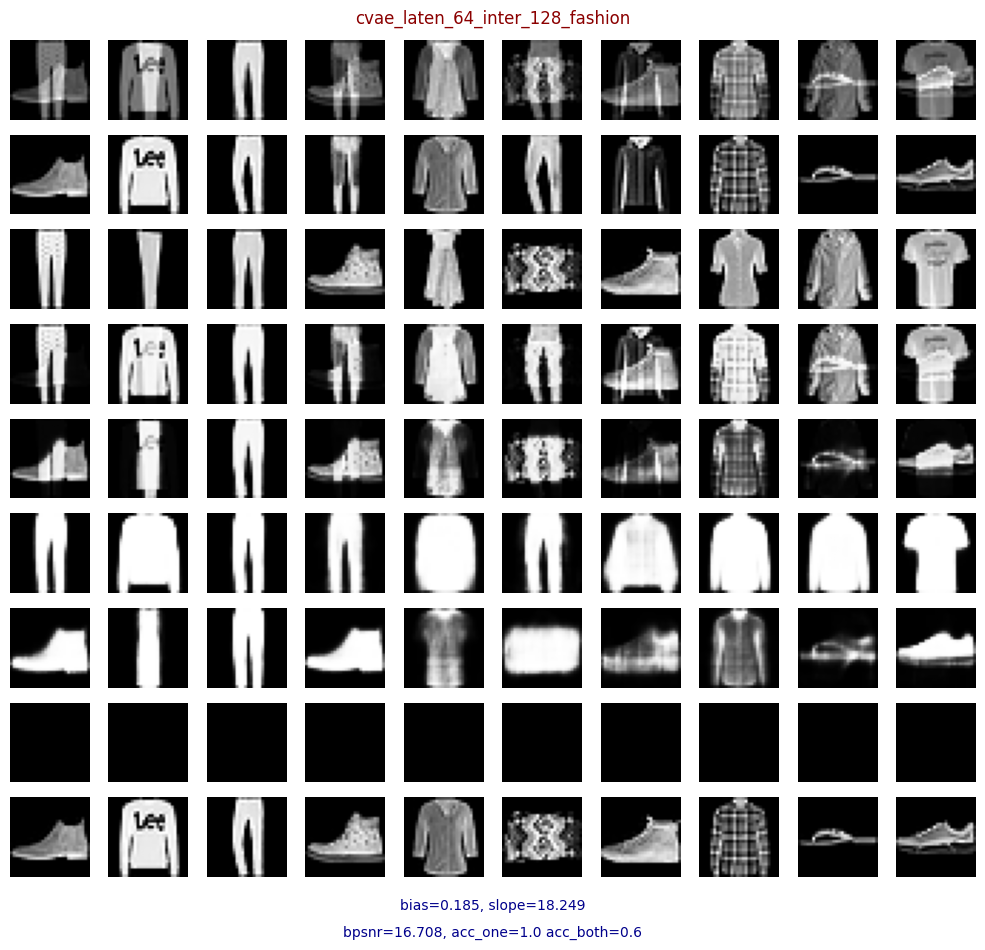

In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))
from experiments import load
from CROP_models.crop import crop

dataset="fashion"

data = load.data(dataset=dataset)
predictor = load.predictor(dataset=dataset)
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_val"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_val"]
x_train_1 = data["x_train_1"]
y_train_1 = data["y_train_1"]  
x_test_1  =data["x_test_1"]
y_test_1  =data["y_test_1"]


model = load.cvae(lat=64, inter=128,dataset=dataset)


# bias default: 0.22
# slope default: 22

# bias optimizados: 0.18495822150909808,
# slope optimizados: 18.248678323921897

crop_f0 = crop(model,predictor=predictor,slope=18.248678323921897, bias=0.18495822150909808, data=data)

start =0
end =start+10

metrics  = crop_f0.unmix(
    x_test[start:end],
    x_test_1[start:end],
    y_test[start:end],
    y_test_1[start:end],
    show_image=True)
